In [76]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt


def load_jsons(data_path, file):
    """ helper function to load '.json' files (they're not proper jsons) """
    file_path = data_path + file
    with open(file_path) as jsons:
        lines = [json.loads(json_line) for json_line in jsons]
    return pd.DataFrame(lines)

In [77]:
# Load data for town called Ambridge
data_path = './data/cleveland/'
review_file = 'review.json'
business_file = 'business.json'
user_file = 'user.json'
tip_file = 'tip.json'
checkin_file = 'checkin.json'

reviews = load_jsons(data_path, review_file)
businesses = load_jsons(data_path, business_file)
users = load_jsons(data_path, user_file)
tips = load_jsons(data_path, tip_file)
checkins = load_jsons(data_path, checkin_file)

In [78]:
# function for making utility matrix
def CountFrequency(my_list): 
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

In [97]:
# collects all the business id's
bs_restaurant = categorie_splitter(['restaurants', 'food'])['business_id'].to_list()
bs_automotive = categorie_splitter(['automotive'])['business_id'].to_list()
bs_nightlife = categorie_splitter(['nightlife', 'bars'])['business_id'].to_list()
bs_shopping = categorie_splitter(['shopping'])['business_id'].to_list()
bs_all = reviews['business_id'].to_list()

In [98]:
#creates utility matrix for new catagories
def create_utility_nc(bs_restaurant):
    dic1 = {}
    dic1a = {}
    dic1b = {}
    dic1c = {}
    for index, row in reviews.iterrows():
        if row['business_id'] in bs_restaurant:
            if row['business_id'] not in dic1:
                dic1[row['business_id']] = 0
            dic1[row['business_id']] += row['cool']

    for i in dic1.keys():
        if dic1[i] < 4:
            dic1a[i] = 1
            dic1b[i] = 0
            dic1c[i] = 0
        elif dic1[i] < 20:
            dic1a[i] = 0
            dic1b[i] = 1
            dic1c[i] = 0
        else:
            dic1a[i] = 0
            dic1b[i] = 0
            dic1c[i] = 1

    dic2 = {}
    dic2a = {}
    dic2b = {}
    dic2c = {}
    for index, row in reviews.iterrows():
        if row['business_id'] in bs_restaurant:
            if row['business_id'] not in dic2:
                dic2[row['business_id']] = 0
            dic2[row['business_id']] += row['funny']

    for i in dic2.keys():
        if dic2[i] < 4:
            dic2a[i] = 1
            dic2b[i] = 0
            dic2c[i] = 0
        elif dic2[i] < 20:
            dic2a[i] = 0
            dic2b[i] = 1
            dic2c[i] = 0
        else:
            dic2a[i] = 0
            dic2b[i] = 0
            dic2c[i] = 1

    dic3 = {}
    dic3a = {}
    dic3b = {}
    dic3c = {}
    for index, row in reviews.iterrows():
        if row['business_id'] in bs_restaurant:
            if row['business_id'] not in dic3:
                dic3[row['business_id']] = 0
            dic3[row['business_id']] += row['useful']

    for i in dic3.keys():
        if dic3[i] < 10:
            dic3a[i] = 1
            dic3b[i] = 0
            dic3c[i] = 0
        elif dic3[i] < 35:
            dic3a[i] = 0
            dic3b[i] = 1
            dic3c[i] = 0
        else:
            dic3a[i] = 0
            dic3b[i] = 0
            dic3c[i] = 1

    dic4 = {}
    dic4a = {}
    dic4b = {}
    dic4c = {}
    for index, row in reviews.iterrows():
        if row['business_id'] in bs_restaurant:
            if row['business_id'] not in dic4:
                dic4[row['business_id']] = [0,0]
            dic4[row['business_id']][0] += 1
            dic4[row['business_id']][1] += len(row['text'])

    for i in dic4.keys():
        if dic4[i][1]/dic4[i][0] < 475:
            dic4a[i] = 1
            dic4b[i] = 0
            dic4c[i] = 0
        elif dic4[i][1]/dic4[i][0] < 650:
            dic4a[i] = 0
            dic4b[i] = 1
            dic4c[i] = 0
        else:
            dic4a[i] = 0
            dic4b[i] = 0
            dic4c[i] = 1

    cooldf1 = pd.DataFrame(dic1a.values(), index = dic1a.keys(),columns={"cool_1"})
    cooldf2 = pd.DataFrame(dic1b.values(), index = dic1b.keys(),columns={"cool_2"})
    cooldf3 = pd.DataFrame(dic1c.values(), index = dic1c.keys(),columns={"cool_3"})
    df_21 = pd.DataFrame(dic2a.values(), index = dic2a.keys(),columns={"Funny_1"})
    df_22 = pd.DataFrame(dic2b.values(), index = dic2b.keys(),columns={"Funny_2"})
    df_23 = pd.DataFrame(dic2c.values(), index = dic2c.keys(),columns={"Funny_3"})
    df_31 = pd.DataFrame(dic3a.values(), index = dic3a.keys(),columns={"useful1"})
    df_32 = pd.DataFrame(dic3b.values(), index = dic3b.keys(),columns={"useful2"})
    df_33 = pd.DataFrame(dic3c.values(), index = dic3c.keys(),columns={"useful3"})
    df_41 = pd.DataFrame(dic4a.values(), index = dic4a.keys(), columns={'textlength1'})
    df_42 = pd.DataFrame(dic4b.values(), index = dic4b.keys(), columns={'textlength2'})
    df_43 = pd.DataFrame(dic4c.values(), index = dic4c.keys(), columns={'textlength3'})
    result = pd.concat([cooldf1,cooldf2,cooldf3,df_21,df_22,df_23,df_31,df_32,df_33,df_41,df_42,df_43],axis=1)
    return result


In [99]:
# utility matrices for every categorie
util_rest = create_utility_nc(bs_restaurant)
util_night = create_utility_nc(bs_nightlife)
util_auto = create_utility_nc(bs_automotive)
util_shop = create_utility_nc(bs_shopping)
util_all = create_utility_nc(bs_all)

In [100]:
def extract_categories(businesses):
    """Create an unfolded genre dataframe. Unpacks categories seprated by a ',' into seperate rows.

    Arguments:
    movies -- a dataFrame containing at least the columns 'business_id' and 'categories' 
              where categories are seprated by ','
    """
    businesses = businesses.drop(businesses[businesses['categories'].isna()].index)
    categories_m = businesses.apply(lambda row: pd.Series([row['business_id']] + row['categories'].lower().split(",")), axis=1)
    stack_categories = categories_m.set_index(0).stack()
    df_stack_categories = stack_categories.to_frame()
    df_stack_categories['business_id'] = stack_categories.index.droplevel(1)
    df_stack_categories.columns = ['categorie', 'business_id']
    return df_stack_categories.reset_index()[['business_id', 'categorie']]

def pivot_categories(df):
    """Create a one-hot encoded matrix for categories.
    
    Arguments:
    df -- a dataFrame containing at least the columns 'business_id' and 'categories'
    
    Output:
    a matrix containing '0' or '1' in each cell.
    1: the business has the categorie
    0: the business does not have the categorie
    """
    return df.pivot_table(index = 'business_id', columns = 'categorie', aggfunc = 'size', fill_value=0)

def categorie_splitter(tags):
    subset_ids = business_categories[business_categories['categorie'].isin(tags)]['business_id']
    subset = businesses[businesses['business_id'].isin(subset_ids)]
    subset_categories = extract_categories(subset)
    subset_categories['categorie'] = subset_categories['categorie'].apply(lambda x: x.strip())
    return subset_categories

def utility_maker(tags):
    categories = categorie_splitter(tags)
    utility = pivot_categories(categories)
    return utility

In [101]:
def create_similarity_matrix_jaccard(matrix):
    m11 = matrix @ matrix.T
    m10 = pd.DataFrame(matrix.sum(axis = 1).values + np.zeros(m11.shape), index = m11.index, columns = m11.index)
    m01 = m10.T
    return m11/(m01 + m10 - m11)


similarity_rest = create_similarity_matrix_jaccard(util_rest)
similarity_all = create_similarity_matrix_jaccard(util_all)
similarity_night = create_similarity_matrix_jaccard(util_night)
similarity_shop = create_similarity_matrix_jaccard(util_shop)
similarity_auto = create_similarity_matrix_jaccard(util_auto)


In [102]:
def split_data(data, d = 0.75):
    """Split data in a training and test set.
    
    Arguments:
    data -- any dataFrame.
    d    -- the fraction of data in the training set
    """
    np.random.seed(seed=5)
    mask_test = np.random.rand(data.shape[0]) < d
    return data[mask_test], data[~mask_test]

def pivot_ratings(ratings):
    """Creates a utility matrix for user ratings for businesses
    
    Arguments:
    df -- a dataFrame containing at least the columns 'user_id' and 'business_id'
    
    Output:
    a matrix containing a rating in each cell. np.nan means that the user did not rate the business
    """
    ratings.drop_duplicates(['business_id', 'user_id'], keep='first', inplace=True)      
    return ratings.pivot(values='stars', columns='user_id', index='business_id')

In [103]:
df_ratings_training, df_ratings_test = split_data(reviews, d=0.75)

# only get reviews of businesses within the top categories
ratings_training_rest = df_ratings_training[df_ratings_training['business_id'].isin(util_rest.index)]
utility_ratings_rest = pivot_ratings(ratings_training_rest)

ratings_training_all = df_ratings_training[df_ratings_training['business_id'].isin(util_all.index)]
utility_ratings_all = pivot_ratings(ratings_training_all)

ratings_training_night = df_ratings_training[df_ratings_training['business_id'].isin(util_night.index)]
utility_ratings_night = pivot_ratings(ratings_training_night)

ratings_training_auto = df_ratings_training[df_ratings_training['business_id'].isin(util_auto.index)]
utility_ratings_auto = pivot_ratings(ratings_training_auto)

ratings_training_shop = df_ratings_training[df_ratings_training['business_id'].isin(util_shop.index)]
utility_ratings_shop = pivot_ratings(ratings_training_shop)


/home/jurriaan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [104]:
ratings_test_restaurants = df_ratings_test[df_ratings_test['business_id'].isin(util_rest.index)]
ratings_test_nightlife = df_ratings_test[df_ratings_test['business_id'].isin(util_night.index)]
ratings_test_shopping = df_ratings_test[df_ratings_test['business_id'].isin(util_shop.index)]
ratings_test_automotive = df_ratings_test[df_ratings_test['business_id'].isin(util_auto.index)]
ratings_test_all = df_ratings_test[df_ratings_test['business_id'].isin(util_all.index)]

In [105]:
def predict_ratings(similarity, utility, to_predict):
    """Predicts the predicted rating for the input test data.
    
    Arguments:
    similarity -- a dataFrame that describes the similarity between items
    utility    -- a dataFrame that contains a rating for each user (columns) and each business (rows). 
                  If a user did not rate a business the value np.nan is assumed. 
    to_predict -- A dataFrame containing at least the columns movieId and userId for which to do the predictions
    """
    # copy input (don't overwrite)
    ratings_test_c = to_predict.copy()
    # apply prediction to each row
    ratings_test_c['predicted rating'] = to_predict.apply(lambda row: predict_ids(similarity, utility, row['user_id'], row['business_id']), axis=1)
    return ratings_test_c.dropna()

### Helper functions for predict_ratings_item_based ###

def predict_ids(similarity, utility, userId, itemId):
    # select right series from matrices and compute
    if userId in utility.columns and itemId in similarity.index:
        return predict_vectors(utility.loc[:,userId], similarity[itemId])
    return 0

def predict_vectors(user_ratings, similarities):
    # select only businesses actually rated by user
    relevant_ratings = user_ratings.dropna()
    
    # select corresponding similarities
    similarities_s = similarities[relevant_ratings.index]
    
    # select neighborhood
    similarities_s = similarities_s[similarities_s > 0.0]
    relevant_ratings = relevant_ratings[similarities_s.index]
    
    # if there's nothing left return a prediction of 0
    norm = similarities_s.sum()
    if(norm == 0):
        return 0
    
    # compute a weighted average (i.e. neighborhood is all) 
    return np.dot(relevant_ratings, similarities_s)/norm


In [106]:
predicted_restaurants = predict_ratings(similarity_rest, utility_ratings_rest, ratings_test_restaurants[['user_id', 'business_id', 'stars']])
predicted_nightlife = predict_ratings(similarity_night, utility_ratings_night, ratings_test_nightlife[['user_id', 'business_id', 'stars']])
predicted_shopping = predict_ratings(similarity_shop, utility_ratings_shop, ratings_test_shopping[['user_id', 'business_id', 'stars']])
predicted_automotive = predict_ratings(similarity_auto, utility_ratings_auto, ratings_test_automotive[['user_id', 'business_id', 'stars']])
predicted_all = predict_ratings(similarity_all, utility_ratings_all, ratings_test_all[['user_id', 'business_id', 'stars']])


def nul_filter(row):
    if row['predicted rating'] == 0:
        business = businesses[businesses['business_id'] == row['business_id']]
        avg = business['stars'].values
        row['predicted rating'] = avg[0]
    return row

predicted_restaurants = predicted_restaurants.apply(lambda row: nul_filter(row), axis=1)
predicted_nightlife = predicted_nightlife.apply(lambda row: nul_filter(row), axis=1)
predicted_shopping = predicted_shopping.apply(lambda row: nul_filter(row), axis=1)
predicted_automotive = predicted_automotive.apply(lambda row: nul_filter(row), axis=1)
predicted_all = predicted_new_categories.apply(lambda row: nul_filter(row), axis=1)

#predicted_restaurants = predicted_restaurants[predicted_restaurants['predicted rating'] != 0]
#predicted_nightlife = predicted_nightlife[predicted_nightlife['predicted rating'] != 0]
#predicted_shopping = predicted_shopping[predicted_shopping['predicted rating'] != 0]
#predicted_automotive = predicted_automotive[predicted_automotive['predicted rating'] != 0]


In [107]:
def mse(predicted_ratings):
    '''Bereken de mean squared error van de voorspelde ratings'''
    predicted_ratings['difference'] = predicted_ratings['stars'] - predicted_ratings['predicted rating']
    error = sum((predicted_ratings['difference'].dropna())**2) / len(predicted_ratings)
    return error

mse_restaurants = mse(predicted_restaurants)
mse_nightlife = mse(predicted_nightlife)
mse_shopping = mse(predicted_shopping)
mse_automotive = mse(predicted_automotive)
mse_nc = mse(predicted_all)

#mse_restaurants_filtered = mse(predicted_restaurants[predicted_restaurants['predicted rating'] != 0])
#mse_nightlife_filtered = mse(predicted_nightlife[predicted_nightlife['predicted rating'] != 0])
#mse_shopping_filtered = mse(predicted_shopping[predicted_shopping['predicted rating'] != 0])
#mse_automotive_filtered = mse(predicted_automotive[predicted_automotive['predicted rating'] != 0])

print('mse   | rest  | nightli | shop  | auto | all')
print('------+-------+---------+----- -+--------+--------')
print(f'normal| {mse_restaurants:.3f} |  {mse_nightlife:.3f} | {mse_shopping:.3f}| {mse_automotive:.3f} | {mse_nc:.3f}')
#print(f'filter| {mse_restaurants_filtered:.3f} |  {mse_nightlife_filtered:.3f}  | {mse_shopping_filtered:.3f} | {mse_automotive_filtered:.3f}')

#print(len(predicted_restaurants), len(predicted_restaurants[predicted_restaurants['predicted rating'] != 0]))

mse   | rest  | nightli | shop  | auto | all
------+-------+---------+----- -+--------+--------
normal| 1.816 |  1.805 | 1.693| 2.334 | 1.805


In [108]:
def predict_random(df):
    predicted_random = df.copy()[['user_id', 'business_id', 'stars']]
    predicted_random['predicted rating'] = predicted_random.apply(lambda x : np.random.uniform(0.5, 5.0), axis=1)
    return predicted_random

random_restaurants = predict_random(predicted_restaurants)
random_nightlife = predict_random(predicted_nightlife)
random_shopping = predict_random(predicted_shopping)
random_automotive = predict_random(predicted_automotive)
random_all = predict_random(predicted_all)

mse_restaurants_random = mse(random_restaurants)
mse_nightlife_random = mse(random_nightlife)
mse_shopping_random = mse(random_shopping)
mse_automotive_random = mse(random_automotive)
mse_all_random = mse(random_all)

print('mse   | rest  | nightli | shop  | auto | all')
print('------+-------+---------+----- -+----+----')
print(f'normal| {mse_restaurants:.3f} |  {mse_nightlife:.3f}  | {mse_shopping:.3f} | {mse_automotive:.3f} | {mse_nc:.3f}')
print(f'random| {mse_restaurants_random:.3f} |  {mse_nightlife_random:.3f}  | {mse_shopping_random:.3f} | {mse_automotive_random:.3f} | {mse_all_random:.3f}')

mse   | rest  | nightli | shop  | auto | all
------+-------+---------+----- -+----+----
normal| 1.816 |  1.805  | 1.693 | 2.334 | 1.805
random| 4.605 |  4.408  | 4.888 | 5.433 | 4.430


In [138]:
def predict_mean(df):
    predicted_item_mean = df.copy()[['user_id', 'business_id', 'stars']]
    group = df_ratings_training.groupby('business_id')
    ratings = group['stars'].aggregate(list).apply(np.mean)
    predicted_item_mean = predicted_item_mean.join(ratings, on='business_id', how='left', lsuffix='', rsuffix='2')
    predicted_item_mean = predicted_item_mean.rename(columns={'stars2': 'predicted rating'})
    
    return predicted_item_mean

mean_restaurants = predict_mean(predicted_restaurants)
mean_nightlife = predict_mean(predicted_nightlife)
mean_shopping = predict_mean(predicted_shopping)
mean_automotive = predict_mean(predicted_automotive)
mean_nc = predict_mean(predicted_all)


mse_restaurants_mean = mse(mean_restaurants)
mse_nightlife_mean = mse(mean_nightlife)
mse_shopping_mean = mse(mean_shopping)
mse_automotive_mean = mse(mean_automotive)
mse_nc_mean = mse(mean_nc)


print('mse   | rest  | nightli | shop  | auto | all')
print('------+-------+---------+------+--------')
print(f'normal| {mse_restaurants:.3f} |  {mse_nightlife:.3f}  | {mse_shopping:.3f} | {mse_automotive:.3f} | {mse_nc:.3f}')
print(f'random| {mse_restaurants_random:.3f} |  {mse_nightlife_random:.3f}  | {mse_shopping_random:.3f} | {mse_automotive_random:.3f} | {mse_all_random:.3f}')
print(f'mean  | {mse_restaurants_mean:.3f} |  {mse_nightlife_mean:.3f}  | {mse_shopping_mean:.3f} | {mse_automotive_mean:.3f} | {mse_nc_mean:.3f}')

mse   | rest  | nightli | shop  | auto | all
------+-------+---------+------+--------
normal| 1.816 |  1.805  | 1.693 | 2.334 | 1.805
random| 4.605 |  4.408  | 4.888 | 5.433 | 4.430
mean  | 1.476 |  1.547  | 1.546 | 2.902 | 1.547


In [110]:
def recommended(predictions, treshold):
    '''Selecteer bedrijven die je wilt aanbevelen, dus met een voorspelde rating boven de treshold'''
    recommended_businesses = predictions.loc[predictions['predicted rating'] >= treshold]
    return recommended_businesses
    

def hidden(predictions, treshold):
    '''Selecteer bedrijven die je niet wilt aanbevelen, dus met een voorspelde rating beneden de treshold'''
    hidden_businesses = predictions.loc[predictions['predicted rating'] < treshold]
    return hidden_businesses
    
    
treshold_recommended = 3 # Boven welke voorspelde rating wil je bedrijven aanbevelen

recommended_restaurants = recommended(predicted_restaurants, treshold_recommended)
hidden_restaurants = hidden(predicted_restaurants, treshold_recommended)

recommended_nightlife = recommended(predicted_nightlife, treshold_recommended)
hidden_nightlife = hidden(predicted_nightlife, treshold_recommended)

recommended_shopping = recommended(predicted_shopping, treshold_recommended)
hidden_shopping = hidden(predicted_shopping, treshold_recommended)

recommended_automotive = recommended(predicted_automotive, treshold_recommended)
hidden_automotive = hidden(predicted_automotive, treshold_recommended)

recommended_nc = recommended(predicted_nc, treshold_recommended)
hidden_nc = hidden(predicted_nc, treshold_recommended)

print('restaurants:')
print(f'Test items : {predicted_restaurants.shape[0]}')
print(f'Recommended: {recommended_restaurants.shape[0]}')
print(f'Hidden     : {hidden_restaurants.shape[0]}')
print()
print('shopping:')
print(f'Test items : {predicted_shopping.shape[0]}')
print(f'Recommended: {recommended_shopping.shape[0]}')
print(f'Hidden     : {hidden_shopping.shape[0]}')
print()
print('nightlife:')
print(f'Test items : {predicted_nightlife.shape[0]}')
print(f'Recommended: {recommended_nightlife.shape[0]}')
print(f'Hidden     : {hidden_nightlife.shape[0]}')
print()
print('automotive:')
print(f'Test items : {predicted_automotive.shape[0]}')
print(f'Recommended: {recommended_automotive.shape[0]}')
print(f'Hidden     : {hidden_automotive.shape[0]}')
print()
print('new categories:')
print(f'Test items : {predicted_nc.shape[0]}')
print(f'Recommended: {recommended_nc.shape[0]}')
print(f'Hidden     : {hidden_nc.shape[0]}')

restaurants:
Test items : 23041
Recommended: 20642
Hidden     : 2399

shopping:
Test items : 1462
Recommended: 1243
Hidden     : 219

nightlife:
Test items : 8684
Recommended: 7859
Hidden     : 825

automotive:
Test items : 510
Recommended: 387
Hidden     : 123

new categories:
Test items : 8684
Recommended: 7859
Hidden     : 825


In [111]:
def used(predictions, treshold):
    used_movies = predictions.loc[predictions['stars'] >= treshold]
    return used_movies

    
def unused(predictions, treshold):
    unused_movies = predictions.loc[predictions['stars'] < treshold]
    return unused_movies
    
    
treshold_used = 4.0
used_restaurants = used(predicted_restaurants, treshold_used)
unused_restaurants = unused(predicted_restaurants, treshold_used)

used_nightlife = used(predicted_nightlife, treshold_used)
unused_nightlife = unused(predicted_nightlife, treshold_used)

used_shopping = used(predicted_shopping, treshold_used)
unused_shopping = unused(predicted_shopping, treshold_used)

used_automotive = used(predicted_automotive, treshold_used)
unused_automotive = unused(predicted_automotive, treshold_used)


In [112]:
def confusion(recommended, hidden, used, unused):
    true_positives = len(recommended.index.intersection(used.index))
    false_positives = len(recommended.index.intersection(unused.index))
    true_negatives = len(hidden.index.intersection(unused.index))
    false_negatives = len(hidden.index.intersection(used.index))
    
    data = {'used': [true_positives, false_negatives],
            'unused': [false_positives, true_negatives]}
    
    confusion_matrix = pd.DataFrame(data, index = ['recommended', 'hidden'])

    return confusion_matrix
    
    
confusion_restaurants = confusion(recommended_restaurants, hidden_restaurants, used_restaurants, unused_restaurants)
confusion_nightlife = confusion(recommended_nightlife, hidden_nightlife, used_nightlife, unused_nightlife)
confusion_shopping = confusion(recommended_shopping, hidden_shopping, used_shopping, unused_shopping)
confusion_automotive = confusion(recommended_automotive, hidden_automotive, used_automotive, unused_automotive)
display(confusion_restaurants)

,used,unused
recommended,14725,5917
hidden,1067,1332


In [113]:
def precision(confusion_matrix):
    true_positives = confusion_matrix['used']['recommended']
    false_positives = confusion_matrix['unused']['recommended']
    precision = true_positives / (true_positives + false_positives)
    return precision
    

precision_restaurants = precision(confusion_restaurants)
precision_nightlife = precision(confusion_nightlife)
precision_shopping = precision(confusion_shopping)
precision_automotive = precision(confusion_automotive)

print(f'precision for user based prediction: {precision_restaurants:.2f}')
print(f'precision for user based prediction: {precision_nightlife:.2f}')
print(f'precision for user based prediction: {precision_shopping:.2f}')
print(f'precision for user based prediction: {precision_automotive:.2f}')

precision for user based prediction: 0.71
precision for user based prediction: 0.68
precision for user based prediction: 0.76
precision for user based prediction: 0.74


In [114]:
def recall(confusion_matrix):
    true_positives = confusion_matrix['used']['recommended']
    false_negatives = confusion_matrix['used']['hidden']
    recall = true_positives / (true_positives + false_negatives)
    return recall
    
recall_restaurants = recall(confusion_restaurants)
recall_nightlife = recall(confusion_nightlife)
recall_shopping = recall(confusion_shopping)
recall_automotive = recall(confusion_automotive)

print(f'recall for content based prediction: {recall_restaurants:.2f}')
print(f'recall for content based prediction: {recall_nightlife:.2f}')
print(f'recall for content based prediction: {recall_shopping:.2f}')
print(f'recall for content based prediction: {recall_automotive:.2f}')

recall for content based prediction: 0.93
recall for content based prediction: 0.94
recall for content based prediction: 0.92
recall for content based prediction: 0.89


In [115]:
treshold_recommended = 3.75
treshold_used = 4.0

def evaluation(predictions, treshold_recommended, treshold_used):
    recommended_items = recommended(predictions, treshold_recommended)
    hidden_items = hidden(predictions, treshold_recommended)
    used_items = used(predictions, treshold_used)
    unused_items = unused(predictions, treshold_used)
    
    confusion_matrix = confusion(recommended_items, hidden_items, used_items, unused_items)
    
    precision_value = precision(confusion_matrix)
    recall_value = recall(confusion_matrix)
    
    return precision_value, recall_value

precision_restaurants, recall_restaurants = evaluation(predicted_restaurants, treshold_recommended, treshold_used)
precision_random, recall_random = evaluation(random_restaurants, treshold_recommended, treshold_used)
precision_item_mean, recall_item_mean = evaluation(mean_restaurants, treshold_recommended, treshold_used)

print('           | precision | recall')
print(f'content based |      {precision_restaurants:.2f} |   {recall_restaurants:.2f}')
print(f'random     |      {precision_random:.2f} |   {recall_random:.2f}')
print(f'mean       |      {precision_item_mean:.2f} |   {recall_item_mean:.2f}')

           | precision | recall
content based |      0.77 |   0.70
random     |      0.67 |   0.27
mean       |      0.80 |   0.73


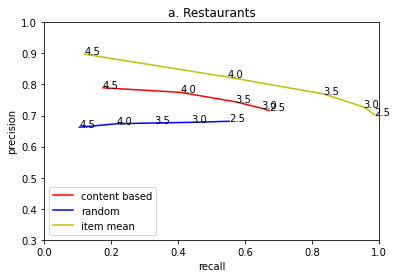

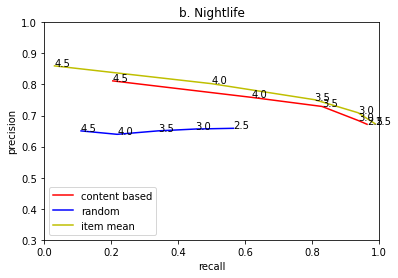

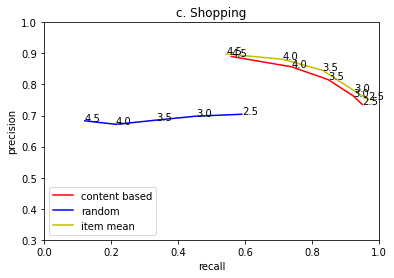

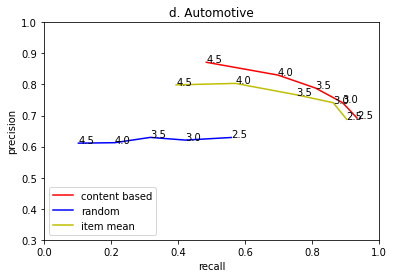

In [143]:
treshold_used = 3.75
treshold_recommended_list = np.arange(2.5, 5.0, 0.5)

def curve(categorie_ib, categorie_random, categorie_mean):
    precision_item_based_list = []
    precision_random_list = []
    precision_item_mean_list = []

    recall_item_based_list = []
    recall_random_list = []
    recall_item_mean_list = []

    for treshold_recommended in treshold_recommended_list: 
        precision_item_based, recall_item_based = evaluation(categorie_ib, treshold_recommended, treshold_used)
        precision_item_based_list.append(precision_item_based)
        recall_item_based_list.append(recall_item_based)
        plt.text(recall_item_based, precision_item_based, treshold_recommended)

        precision_random, recall_random = evaluation(categorie_random, treshold_recommended, treshold_used)
        precision_random_list.append(precision_random)
        recall_random_list.append(recall_random)
        plt.text(recall_random, precision_random, treshold_recommended)

        precision_item_mean, recall_item_mean = evaluation(categorie_mean, treshold_recommended, treshold_used)
        precision_item_mean_list.append(precision_item_mean)
        recall_item_mean_list.append(recall_item_mean)
        plt.text(recall_item_mean, precision_item_mean, treshold_recommended)
    
    return precision_item_based_list, precision_random_list, precision_item_mean_list, recall_item_based_list, recall_random_list, recall_item_mean_list

# plot voor restaurants
precision_item_based_list, precision_random_list, precision_item_mean_list, recall_item_based_list, recall_random_list, recall_item_mean_list = curve(predicted_restaurants, random_restaurants, mean_restaurants)
plt.plot(recall_item_based_list, precision_item_based_list, 'r-')
plt.plot(recall_random_list, precision_random_list, 'b-')
plt.plot(recall_item_mean_list, precision_item_mean_list, 'y-')

plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(['content based', 'random', 'item mean'], loc = 'lower left')
plt.title('a. Restaurants')
plt.show()

# plot voor nightlife
precision_item_based_list, precision_random_list, precision_item_mean_list, recall_item_based_list, recall_random_list, recall_item_mean_list = curve(predicted_nightlife, random_nightlife, mean_nightlife)
plt.plot(recall_item_based_list, precision_item_based_list, 'r-')
plt.plot(recall_random_list, precision_random_list, 'b-')
plt.plot(recall_item_mean_list, precision_item_mean_list, 'y-')

plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(['content based', 'random', 'item mean'], loc = 'lower left')
plt.title('b. Nightlife')
plt.show()

# plot voor shopping
precision_item_based_list, precision_random_list, precision_item_mean_list, recall_item_based_list, recall_random_list, recall_item_mean_list = curve(predicted_shopping, random_shopping, mean_shopping)
plt.plot(recall_item_based_list, precision_item_based_list, 'r-')
plt.plot(recall_random_list, precision_random_list, 'b-')
plt.plot(recall_item_mean_list, precision_item_mean_list, 'y-')

plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(['content based', 'random', 'item mean'], loc = 'lower left')
plt.title('c. Shopping')
plt.show()

# plot voor automotive
precision_item_based_list, precision_random_list, precision_item_mean_list, recall_item_based_list, recall_random_list, recall_item_mean_list = curve(predicted_automotive, random_automotive, mean_automotive)
plt.plot(recall_item_based_list, precision_item_based_list, 'r-')
plt.plot(recall_random_list, precision_random_list, 'b-')
plt.plot(recall_item_mean_list, precision_item_mean_list, 'y-')

plt.xlim(0.0, 1.0)
plt.ylim(0.3, 1.0)
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(['content based', 'random', 'item mean'], loc = 'lower left')
plt.title('d. Automotive')
plt.show()

In [141]:
# Maak een lijst van recommended bedrijven voor elke user en stop in dataframe
group_restaurants =  recommended_restaurants.groupby('user_id')
recommendations_restaurants = group_restaurants['business_id']
recommendations_restaurants = recommendations_restaurants.aggregate(list)
recommendations_restaurants = pd.DataFrame(recommendations_restaurants)

group_nightlife =  recommended_nightlife.groupby('user_id')
recommendations_nightlife = group_nightlife['business_id']
recommendations_nightlife = recommendations_nightlife.aggregate(list)
recommendations_nightlife = pd.DataFrame(recommendations_nightlife)

group_shopping =  recommended_shopping.groupby('user_id')
recommendations_shopping = group_shopping['business_id']
recommendations_shopping = recommendations_shopping.aggregate(list)
recommendations_shopping = pd.DataFrame(recommendations_shopping)

group_automotive =  recommended_automotive.groupby('user_id')
recommendations_automotive = group_automotive['business_id']
recommendations_automotive = recommendations_automotive.aggregate(list)
recommendations_automotive = pd.DataFrame(recommendations_automotive)


In [118]:
rest = recommendations_restaurants['business_id'].apply(lambda x: len(x))
night = recommendations_nightlife['business_id'].apply(lambda x: len(x))
shop = recommendations_shopping['business_id'].apply(lambda x: len(x))
auto = recommendations_automotive['business_id'].apply(lambda x: len(x))

print('      | More than 5 recommendations  | Total users that got recommendations:')
print('------+------------------------------+--------------------------------------')
print(f'rest  |         {len(rest[rest >= 5])}                  |            {len(rest)}           ') 
print(f'night |         {len(night[night >= 5])}                  |            {len(night)}           ') 
print(f'shop  |         {len(shop[shop >= 5])}                  |            {len(shop)}           ') 
print(f'auto  |         {len(auto[auto >= 5])}                  |            {len(auto)}           ') 


      | More than 5 recommendations  | Total users that got recommendations:
------+------------------------------+--------------------------------------
rest  |         608                  |            11977           
night |         150                  |            5584           
shop  |         13                  |            1037           
auto  |         0                  |            372           


In [119]:
# Maak een top 5 lijst van bedrijven per catgorie op basis van hun rating
restaurants_top5 = businesses[businesses['business_id'].isin(utility_restaurants.index)].sort_values(by='stars', ascending=False)[0:5]
nightlife_top5 = businesses[businesses['business_id'].isin(utility_nightlife.index)].sort_values(by='stars', ascending=False)[0:5]
shopping_top5 = businesses[businesses['business_id'].isin(utility_shopping.index)].sort_values(by='stars', ascending=False)[0:5]
automotive_top5 = businesses[businesses['business_id'].isin(utility_automotive.index)].sort_values(by='stars', ascending=False)[0:5]



In [120]:
# Locate the users that have less than 20 recommendations
users_missing_restaurants = recommendations_restaurants.loc[recommendations_restaurants['business_id'].map(len) < 5].index
users_missing_nightlife = recommendations_nightlife.loc[recommendations_nightlife['business_id'].map(len) < 5].index
users_missing_shopping = recommendations_shopping.loc[recommendations_shopping['business_id'].map(len) < 5].index
users_missing_automotive = recommendations_automotive.loc[recommendations_automotive['business_id'].map(len) < 5].index

display(users_missing_restaurants)

def filling_up(business_top5, amount_missing):
    '''Selecteert het missende aantal bedrijven uit de top 20 van bedrijven'''
    additional_businesses = business_top5.sample(amount_missing)['business_id'].tolist()
    return additional_businesses

Index(['--Awhttr0FhVud5prVpVlA', '--U0loZF9HaSPRzrGuiWLg',
       '--amZ_cR9Zgu4B1RrAHJyA', '-0S_XaK3Q_Mesal2Unta2w',
       '-0Xu57zrI3Rxi8wGZsnWKQ', '-0cu1eLTYG-TJCer9VVF9A',
       '-0x2ov-qcCopv32Imm-TYg', '-14qTFhM3qDTqMbTpYxe3A',
       '-1YGFe7qDm2yl43AqCbMNg', '-1eUcYsPzr0K_nw67oohdw',
       ...
       'zw6YMjaWYgpe0PQQfJbOkg', 'zwOBz9NqMkP5BD29hWn0HQ',
       'zxL2Wdz18-Op_fBOSYEhuA', 'zxRHyxQm-32j5Z7Pi7bHCA',
       'zxddeTFgG6cZDO4t_1BRwQ', 'zy4NqQpPWNRftutQEhVb1g',
       'zyo-ZIF0jxeZh88gXL45Fw', 'zyoSjBxxWkE7spafdUVeJw',
       'zzDln8w4vq4ePQgnV0tWFA', 'zzL4E_gdoSCtgNhW4BPY8w'],
      dtype='object', name='user_id', length=11369)

In [121]:
def filler(users_missing_recommendations, recommendations_category, business_top5):
    users = []
    businesses_list = []
    for user in users_missing_recommendations:
        index = recommendations_category.loc[recommendations_category.index == user].index
        already_recommended = recommendations_category['business_id'][index]
        amount_missing = 5 - len(recommendations_category['business_id'][index])
        additional_businesses = filling_up(business_top5, amount_missing)
        businesses_list.append(additional_businesses)
        users.append(user)

    new = pd.Series(businesses_list, index = users, name = 'additional recommendations')
    final_recommendations = recommendations_category.join(new, on='user_id')
    return final_recommendations

final_restaurants = filler(users_missing_restaurants, recommendations_restaurants, restaurants_top5)
final_nightlife = filler(users_missing_nightlife, recommendations_nightlife, nightlife_top5)
final_shopping = filler(users_missing_shopping, recommendations_shopping, shopping_top5)
final_automotive = filler(users_missing_automotive, recommendations_automotive, automotive_top5)

display(final_restaurants.head())

,business_id,additional recommendations
user_id,,
--Awhttr0FhVud5prVpVlA,[K6fYrrTorlpXmqutRcrHzg],"[Dc8ygQx5gXHoqYAOmRydNg, Jd7pyrfNdffLM5nMcP4IP..."
--U0loZF9HaSPRzrGuiWLg,[YNI26xBkdOzI1TMGmIcEaw],"[F7tBX4pRGhWxAXr4Ld7dzQ, Jd7pyrfNdffLM5nMcP4IP..."
--amZ_cR9Zgu4B1RrAHJyA,"[LNsZJP6jZ11e0tDljOLPiQ, AbPQf-X7awuPFDULiJ43bg]","[PiQ11tDiQMxvFGbKZpbkSw, Jd7pyrfNdffLM5nMcP4IP..."
-0S_XaK3Q_Mesal2Unta2w,"[wftmt-n8OUA4Ng3bWWH5dw, BLfCMa2yWNo70D3wwAxwo...","[PiQ11tDiQMxvFGbKZpbkSw, mfKYB-iZOZLgPjnYo06fM..."
-0Xu57zrI3Rxi8wGZsnWKQ,[meXjqyhTNLFmknY39y2sMg],"[F7tBX4pRGhWxAXr4Ld7dzQ, Jd7pyrfNdffLM5nMcP4IP..."


In [127]:
utility_restaurants = utility_maker(['restaurants', 'food'])
similarity_restaurants = create_similarity_matrix_jaccard(utility_restaurants)
ratings_training_restaurants = df_ratings_training[df_ratings_training['business_id'].isin(utility_restaurants.index)]
utility_ratings_restaurants = pivot_ratings(ratings_training_restaurants)
predicted_restaurants1 = predict_ratings(similarity_restaurants, utility_ratings_restaurants, df_ratings_test[['user_id', 'business_id', 'stars']])

/home/jurriaan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [136]:
predicted_restaurants2 = predict_ratings(similarity_rest, utility_ratings_rest, ratings_test_restaurants[['user_id', 'business_id', 'stars']])

In [137]:
print("cb1 0 scores")
print(len(predicted_restaurants1[predicted_restaurants1['predicted rating'] == 0]))
print("cb2 0 scores")
print(len(predicted_restaurants2[predicted_restaurants2['predicted rating'] == 0]))

cb1 0 scores
12787
cb2 0 scores
7085


'''Hieronder zijn alleen testjes en plotjes'''